<a href="https://colab.research.google.com/github/juandavid3196/Entregable2/blob/master/Modelos_de_Predicci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Entrenamiento y evaluacion de modelos.**

# **Modelo de Predicción**

In [1]:
!pip install numpy pandas scikit-learn
!pip install --upgrade tensorflow

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Importar dataset desde Drive.
df = pd.read_csv('/content/drive/MyDrive/Version final.csv', sep=';')


**Metodos y Variables**

In [3]:

#características (X) y etiquetas de clase (y).
X = df[['Crossing', 'Finishing', 'Volleys', 'Dribbling', 'BallControl', 'Agility', 'Interceptions']].values
y = df['Position'].map({1: 'Ofensivo', 2: 'Defensivo'}).values

#conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#METODOS

# Evaluar el modelo
def testModel(y_test,y_pred):
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

def performanceMeasure(y_test,y_pred): 
  # Calcular medidas de desempeño
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='Defensivo')
  recall = recall_score(y_test, y_pred, pos_label='Defensivo')
  f1 = f1_score(y_test, y_pred, pos_label='Defensivo')

  # Imprimir las medidas de desempeño
  print("Exactitud:", accuracy)
  print("Precisión:", precision)
  print("Recall:", recall)
  print("F1-Score:", f1)

def trainModel(model,X_train, y_train):
  model.fit(X_train, y_train)

#MODELOS
# Funcion general para probar un modelo
def modelTest(model,X_test,y_test,X_train,y_train):
  trainModel(model,X_train, y_train)
  y_pred = model.predict(X_test)
  testModel(y_test,y_pred)  
  performanceMeasure(y_test,y_pred)

# Funcion general para probar un modelo con datos de PCA.
def modelTestPCA(model,X_test_pca,y_test,X_train_pca,y_train):
  model.fit(X_train_pca,y_train)
  y_pred = model.predict(X_test_pca)
  testModel(y_test,y_pred)  
  performanceMeasure(y_test,y_pred)

# Funcion general para probar un modelo con caracteristicas especificas.
def modelTestASS(model,X_train,y_train,X_test,y_test):
  #Características deseadas
  X_train_selected = X_train[:, [1, 3, 6]] 
  X_test_selected = X_test[:, [1, 3, 6]]
  model.fit(X_train_selected, y_train)
  y_pred = model.predict(X_test_selected)
  testModel(y_test,y_pred)
  performanceMeasure(y_test,y_pred)

def parzen_window(X_train, X_test, h):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    n_features = X_train.shape[1]
    distances = cdist(X_train, X_test, metric='euclidean')
    # Calcula la función de densidad de Parzen
    pdf = np.sum(np.exp(-distances**2 / (2 * h**2)), axis=0) / (np.sqrt(2 * np.pi) * h)**n_features
    return pdf


# **Modelos de Predicción**

**Analisis Discriminante Cuadratico**

In [4]:
model = LinearDiscriminantAnalysis()
modelTest(model,X_test,y_test,X_train,y_train)

              precision    recall  f1-score   support

   Defensivo       0.87      0.93      0.90      1856
    Ofensivo       0.92      0.86      0.89      1768

    accuracy                           0.89      3624
   macro avg       0.90      0.89      0.89      3624
weighted avg       0.90      0.89      0.89      3624

[[1722  134]
 [ 248 1520]]
Exactitud: 0.8945916114790287
Precisión: 0.8741116751269036
Recall: 0.927801724137931
F1-Score: 0.9001568217459488


 **Ventana de Parzen (Metodo kernel)**

In [5]:
# Normalizar características.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Ancho de la ventana.
h = 0.5

#Función de densidad de Parzen.
pdf = parzen_window(X_train, X_test, h)

#Aplicar un umbral.
y_pred = np.where(pdf >= 0.5, 'Defensivo', 'Ofensivo')

#Evaluar el modelo.
testModel(y_test,y_pred)  
performanceMeasure(y_test,y_pred)

              precision    recall  f1-score   support

   Defensivo       0.51      0.99      0.68      1856
    Ofensivo       0.38      0.00      0.01      1768

    accuracy                           0.51      3624
   macro avg       0.44      0.50      0.34      3624
weighted avg       0.44      0.51      0.35      3624

[[1846   10]
 [1762    6]]
Exactitud: 0.5110375275938189
Precisión: 0.511640798226164
Recall: 0.9946120689655172
F1-Score: 0.6756954612005857


 **Gradiente Boostring Tree**

In [6]:
model = GradientBoostingClassifier()
modelTest(model,X_test,y_test,X_train,y_train)

              precision    recall  f1-score   support

   Defensivo       0.89      0.92      0.91      1856
    Ofensivo       0.92      0.88      0.90      1768

    accuracy                           0.90      3624
   macro avg       0.90      0.90      0.90      3624
weighted avg       0.90      0.90      0.90      3624

[[1715  141]
 [ 219 1549]]
Exactitud: 0.9006622516556292
Precisión: 0.8867631851085832
Recall: 0.9240301724137931
F1-Score: 0.9050131926121372


**Maquinas de soporte Vectorial:**

In [7]:
model = SVC(kernel='rbf', C=1.0, random_state=42)
modelTest(model,X_test,y_test,X_train,y_train)

              precision    recall  f1-score   support

   Defensivo       0.89      0.93      0.91      1856
    Ofensivo       0.92      0.88      0.90      1768

    accuracy                           0.91      3624
   macro avg       0.91      0.90      0.90      3624
weighted avg       0.91      0.91      0.90      3624

[[1722  134]
 [ 210 1558]]
Exactitud: 0.9050772626931567
Precisión: 0.8913043478260869
Recall: 0.927801724137931
F1-Score: 0.9091869060190073


**Redes Neuronales Artificiales**

In [8]:
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', random_state=42)
modelTest(model,X_test,y_test,X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

   Defensivo       0.91      0.90      0.90      1856
    Ofensivo       0.89      0.90      0.90      1768

    accuracy                           0.90      3624
   macro avg       0.90      0.90      0.90      3624
weighted avg       0.90      0.90      0.90      3624

[[1664  192]
 [ 174 1594]]
Exactitud: 0.8990066225165563
Precisión: 0.9053318824809575
Recall: 0.896551724137931
F1-Score: 0.9009204114780726


# **B. Seleccion y extraccion de caracteresticas.**

# **1. Análisis de correlación **

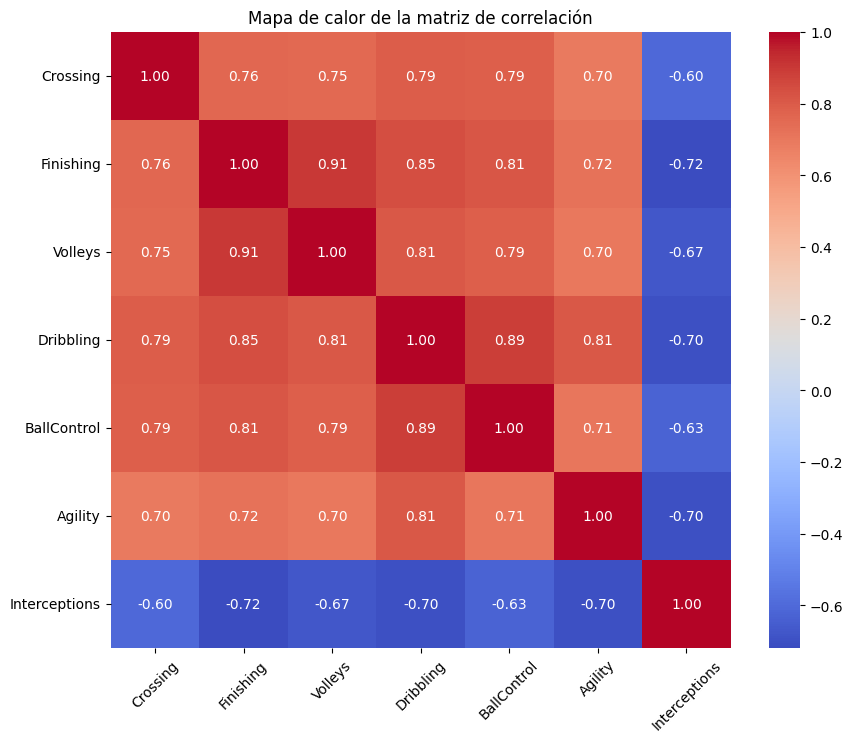

In [9]:
# Filtrar los primeros 100 datos de la clase 1 (Ofensivo) y 2 (defensivo).
class_1_data = df[df['Position'] == 1].head(100)
class_2_data = df[df['Position'] == 2].head(100)

selected_data = pd.concat([class_1_data, class_2_data])

# Matriz de correlación.
correlation_matrix = selected_data.drop('Position', axis=1).corr(method='pearson')

# Mapa de calor utilizando seaborn.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_xticklabels(correlation_matrix.columns, rotation=45)
ax.set_yticklabels(correlation_matrix.columns, rotation=0)
ax.set_title('Mapa de calor de la matriz de correlación')
plt.show()


## 2. Indice de Fisher

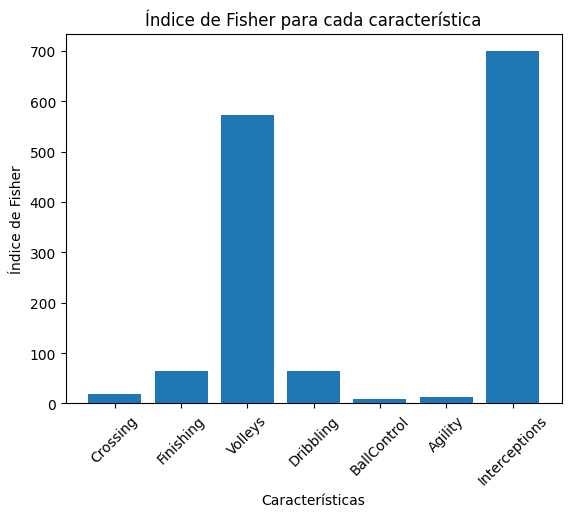

In [10]:

# Filtrar los primeros 100 datos de la clase 1 (Ofensivo) y 2 (defensivo).
class_1_data = df[df['Position'] == 1].head(100)
class_2_data = df[df['Position'] == 2].head(100)

# Medidas y Matriz de Covarianza.
mean_class_1 = class_1_data.drop('Position', axis=1).mean().values
mean_class_2 = class_2_data.drop('Position', axis=1).mean().values
cov_class_1 = np.cov(class_1_data.drop('Position', axis=1).values.T)
cov_class_2 = np.cov(class_2_data.drop('Position', axis=1).values.T)

# Indice de Fisher para cada característica.
fisher_scores = ((mean_class_1 - mean_class_2)**2) / (cov_class_1 + cov_class_2)

# Media de los scores para cada característica.
fisher_scores_mean = np.mean(fisher_scores, axis=0)

# Asignar nombres.
feature_names = class_1_data.drop('Position', axis=1).columns

# Grafico de Barras.
plt.bar(feature_names, fisher_scores_mean)
plt.xticks(rotation=45)
plt.xlabel('Características')
plt.ylabel('Índice de Fisher')
plt.title('Índice de Fisher para cada característica')
plt.show()

# **2. Metodo de busqueda secuencial ascendente:**

In [11]:

# Clasificador.
clf = DecisionTreeClassifier(criterion='gini')

# Selector de características secuencial ascendente.
sfs = SequentialFeatureSelector(clf, direction='forward')

# Ajustar el selector a los datos de entrenamiento.
sfs.fit(X_train.astype(int), y_train)

# Características seleccionadas.
selected_features = X_train[:, list(sfs.support_)]

# Entrenar el clasificador.
clf.fit(selected_features, y_train)

# Predecir las etiquetas de clase para los datos de prueba.
y_pred = clf.predict(X_test[:, list(sfs.support_)])

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)

# Imprimir las características seleccionadas
print("Características seleccionadas:", list(sfs.support_))
print("Exactitud del modelo:", exactitud)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Características seleccionadas: [False, True, False, False, False, True, True]
Exactitud del modelo: 0.8460264900662252


 **Caracterisrticas Seleccionada:**

'Finishing'
'Dribbling'
'Interceptions'

**Maquinas de soporte Vectorial:**

In [12]:
model = SVC()
modelTestASS(model,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

   Defensivo       0.87      0.93      0.90      1856
    Ofensivo       0.92      0.85      0.89      1768

    accuracy                           0.89      3624
   macro avg       0.90      0.89      0.89      3624
weighted avg       0.90      0.89      0.89      3624

[[1730  126]
 [ 261 1507]]
Exactitud: 0.8932119205298014
Precisión: 0.8689100954294324
Recall: 0.9321120689655172
F1-Score: 0.8994021315310632


**Redes Neuronales Artificiales**

In [13]:
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', random_state=42)
modelTestASS(model,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

   Defensivo       0.88      0.91      0.90      1856
    Ofensivo       0.91      0.87      0.89      1768

    accuracy                           0.89      3624
   macro avg       0.89      0.89      0.89      3624
weighted avg       0.89      0.89      0.89      3624

[[1697  159]
 [ 229 1539]]
Exactitud: 0.8929359823399559
Precisión: 0.8811007268951194
Recall: 0.9143318965517241
F1-Score: 0.8974087784241143


**Gradiente Boostring Tree**

In [14]:
# Crear el modelo de clasificación utilizando Gradient Boosting Tree
model = GradientBoostingClassifier()
modelTestASS(model,X_train,y_train,X_test,y_test)



              precision    recall  f1-score   support

   Defensivo       0.88      0.92      0.90      1856
    Ofensivo       0.91      0.87      0.89      1768

    accuracy                           0.90      3624
   macro avg       0.90      0.89      0.90      3624
weighted avg       0.90      0.90      0.90      3624

[[1711  145]
 [ 234 1534]]
Exactitud: 0.8954194260485652
Precisión: 0.8796915167095116
Recall: 0.921875
F1-Score: 0.9002893975269666


# **3. METODO PCA**

In [15]:
from sklearn.decomposition import PCA

# Instancia de PCA.
pca = PCA(n_components=2) 

# Ajustar y transformar los datos de entrenamiento.
X_train_pca = pca.fit_transform(X_train)

# Transformar los datos de prueba.
X_test_pca = pca.transform(X_test)

**Maquinas de soporte vectorial**

In [16]:
model = SVC(kernel='rbf', C=1.0, random_state=42)
modelTestPCA(model,X_test_pca,y_test,X_train_pca,y_train)

              precision    recall  f1-score   support

   Defensivo       0.87      0.93      0.90      1856
    Ofensivo       0.92      0.86      0.89      1768

    accuracy                           0.89      3624
   macro avg       0.90      0.89      0.89      3624
weighted avg       0.90      0.89      0.89      3624

[[1718  138]
 [ 247 1521]]
Exactitud: 0.8937637969094923
Precisión: 0.8743002544529263
Recall: 0.9256465517241379
F1-Score: 0.8992410363779116


**Redes Neuronales Artificiales**

In [17]:
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', random_state=42)
modelTestPCA(model,X_test_pca,y_test,X_train_pca,y_train)

              precision    recall  f1-score   support

   Defensivo       0.88      0.92      0.90      1856
    Ofensivo       0.91      0.86      0.89      1768

    accuracy                           0.89      3624
   macro avg       0.89      0.89      0.89      3624
weighted avg       0.89      0.89      0.89      3624

[[1711  145]
 [ 242 1526]]
Exactitud: 0.8932119205298014
Precisión: 0.8760880696364567
Recall: 0.921875
F1-Score: 0.8983985297978472


**Gradiente Boostring Tree**

In [18]:
# Crear el modelo de clasificación utilizando Gradient Boosting Tree
model = GradientBoostingClassifier()
modelTestPCA(model,X_test_pca,y_test,X_train_pca,y_train)

              precision    recall  f1-score   support

   Defensivo       0.88      0.91      0.90      1856
    Ofensivo       0.90      0.87      0.89      1768

    accuracy                           0.89      3624
   macro avg       0.89      0.89      0.89      3624
weighted avg       0.89      0.89      0.89      3624

[[1692  164]
 [ 228 1540]]
Exactitud: 0.891832229580574
Precisión: 0.88125
Recall: 0.9116379310344828
F1-Score: 0.8961864406779662
